# Assignment 4:

Completed by: JKtours (jlk635)

Test if the distribution of 
    
1) trip duration of bikers that ride during the day vs night
    
2) age of bikers for trips originating in Manhattan and in Brooklyn
    
are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
For the KS do the test with the entire dataset and with a subset 200 times smaller
    
Choose a single significant threshold for the whole exercise. 
    
For each test phrase the Null Hypothesis in words.
    
Describe the return of the scipy function you use in each case.
    
State the result in terms of rejection of the Null.

In [72]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats

%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'stack', 'figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in data

I'm reading in data from June 2015 (Summer) and January 2016 (Winter) and combine the datasets (using concat which stacks the two dataframes), before the analysis.

In [2]:
datestringSummer = '201506'
getCitiBikeCSV(datestringSummer)

('Downloading', '201506')
file in place, you can continue


In [3]:
dfSummer = pd.read_csv(os.getenv("PUIDATA") + "/" + datestringSummer + '-citibike-tripdata.csv')
dfSummer.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [4]:
dfSummer.shape

(941219, 15)

In [5]:
datestringWinter = '201601'
getCitiBikeCSV(datestringWinter)

('Downloading', '201601')
file in place, you can continue


In [6]:
dfWinter = pd.read_csv(os.getenv("PUIDATA") + "/" + datestringWinter + '-citibike-tripdata.csv')
dfWinter.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [7]:
dfWinter.shape

(509478, 15)

In [18]:
stack = [dfSummer, dfWinter]

dfBikes = pd.concat(stack, ignore_index=True)
dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [19]:
# Review and check files have the same number of records

print("CHECK: Size of combined dataset is {}; and sum of rows in Summer and Winter dataset is: {}").format(dfBikes.shape,  dfSummer.shape[0] + dfWinter.shape[0])   

CHECK: Size of combined dataset is (1450697, 15); and sum of rows in Summer and Winter dataset is: 1450697


# Trip duration analysis

We are interested in whether the trip duration of riders varies depending on if they ride during the day or in the evening:

**H0: there is no statistical difference in the duration of trips for riders during the day, compared with the night (day is defined as startime between 7am and 7pm (otherwise night))**
$$ \alpha = 0.05 $$

Create a new variables for Day Duration (between 7am and 7pm) and Night Duration (7pm to 7am)




In [20]:
dfBikes['date'] = pd.to_datetime(dfBikes['starttime'])

In [28]:
#Create new variables for Day Duration and Night Duration

dfBikes['DayDur'] = dfBikes['tripduration'][(dfBikes['date'].dt.hour >= 7) & (dfBikes['date'].dt.hour < 19)]
dfBikes['NightDur'] = dfBikes['tripduration'][(dfBikes['date'].dt.hour < 7) | (dfBikes['date'].dt.hour >= 19)]

In [29]:
dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,DayDur,NightDur
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00,NaN,1338.0
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00,NaN,290.0
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00,NaN,634.0
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00,NaN,159.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00,NaN,1233.0


In [30]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
dfBikes.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,DayDur,NightDur
count,1.450697e+06,1.450697e+06,1.450697e+06,1.450697e+06,1.450697e+06,1.450697e+06,1.450697e+06,1.450697e+06,1.295760e+06,1.450697e+06,1.115133e+06,3.355640e+05
mean,8.844474e+02,5.896212e+02,4.073577e+01,-7.398976e+01,5.838066e+02,4.073545e+01,-7.398988e+01,1.891234e+04,1.976159e+03,1.094046e+00,8.939377e+02,8.529094e+02
std,5.188851e+03,6.858074e+02,2.020730e-02,1.366361e-02,6.780163e+02,3.936608e-02,6.293193e-02,2.663378e+03,1.154648e+01,5.488241e-01,5.117153e+03,5.420197e+03
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.404630e+01,1.452900e+04,1.885000e+03,0.000000e+00,6.000000e+01,6.000000e+01
25%,3.730000e+02,3.120000e+02,4.072182e+01,-7.399950e+01,3.110000e+02,4.072182e+01,-7.399995e+01,1.667400e+04,NaN,1.000000e+00,NaN,NaN
50%,5.980000e+02,4.320000e+02,4.073705e+01,-7.399054e+01,4.280000e+02,4.073705e+01,-7.399062e+01,1.874500e+04,NaN,1.000000e+00,NaN,NaN
75%,9.850000e+02,4.990000e+02,4.075097e+01,-7.398163e+01,4.980000e+02,4.075066e+01,-7.398163e+01,2.098500e+04,NaN,1.000000e+00,NaN,NaN
max,1.960017e+06,3.244000e+03,4.078721e+01,-7.392989e+01,3.244000e+03,4.078721e+01,0.000000e+00,2.477300e+04,2.000000e+03,2.000000e+00,1.863170e+06,1.960017e+06


In [31]:
# dropping NaN values
dfBikes['DayDur'].dropna(inplace= True)
dfBikes['NightDur'].dropna(inplace= True)

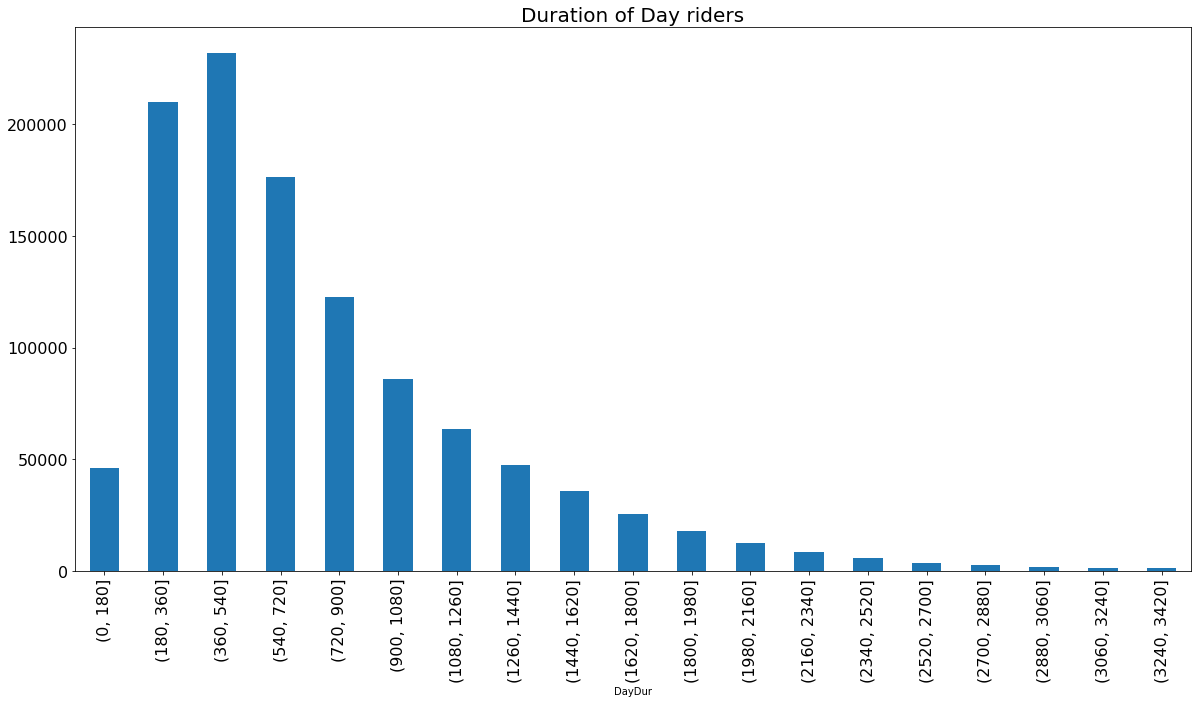

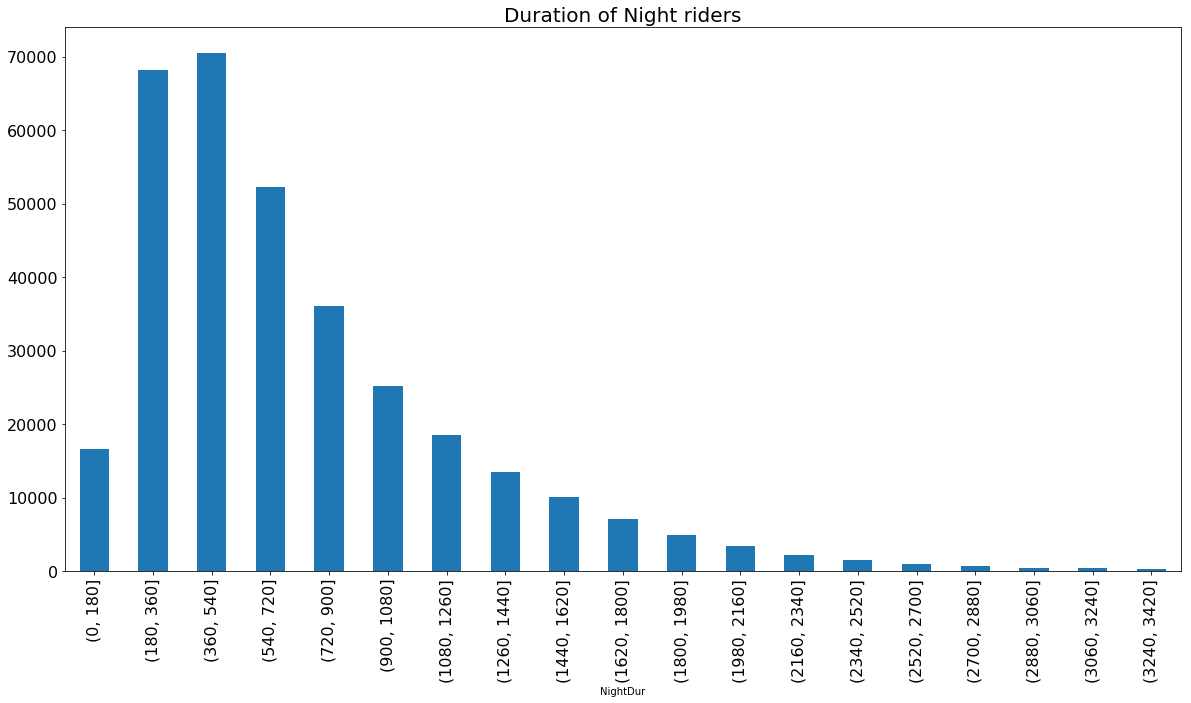

In [50]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 3600, 180)



axDayDur = dfBikes.DayDur.groupby(pd.cut(dfBikes.DayDur, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                                    legend=False, figsize = (20,10), 
                                                                                          fontsize = 16)
axDayDur.set_title("Duration of Day riders", fontsize = 20)



axNightDur = dfBikes.NightDur.groupby(pd.cut(dfBikes.NightDur, bins)).agg([count_nonzero]).plot(kind='bar',
                                                               legend=False, figsize = (20,10),
                                                                                        fontsize = 16)
axNightDur.set_title("Duration of Night riders", fontsize = 20);

#### Figure 1: Histogram of Durations, showing count of number of people who travelled for each duration (indicated by the interval of the bins in seconds), split by day (DayDur) and night (NightDur)

              count_nonzero
DayDur                     
(0, 180]           0.008236
(180, 360]         0.022601
(360, 540]         0.023821
(540, 720]         0.020701
(720, 900]         0.017324
(900, 1080]        0.014896
(1080, 1260]       0.013018
(1260, 1440]       0.010529
(1440, 1620]       0.008280
(1620, 1800]       0.006415
(1800, 1980]       0.004752
(1980, 2160]       0.003585
(2160, 2340]       0.002454
(2340, 2520]       0.001802
(2520, 2700]       0.001403
(2700, 2880]       0.000890
(2880, 3060]       0.000544
(3060, 3240]       0.000307
(3240, 3420]       0.000000


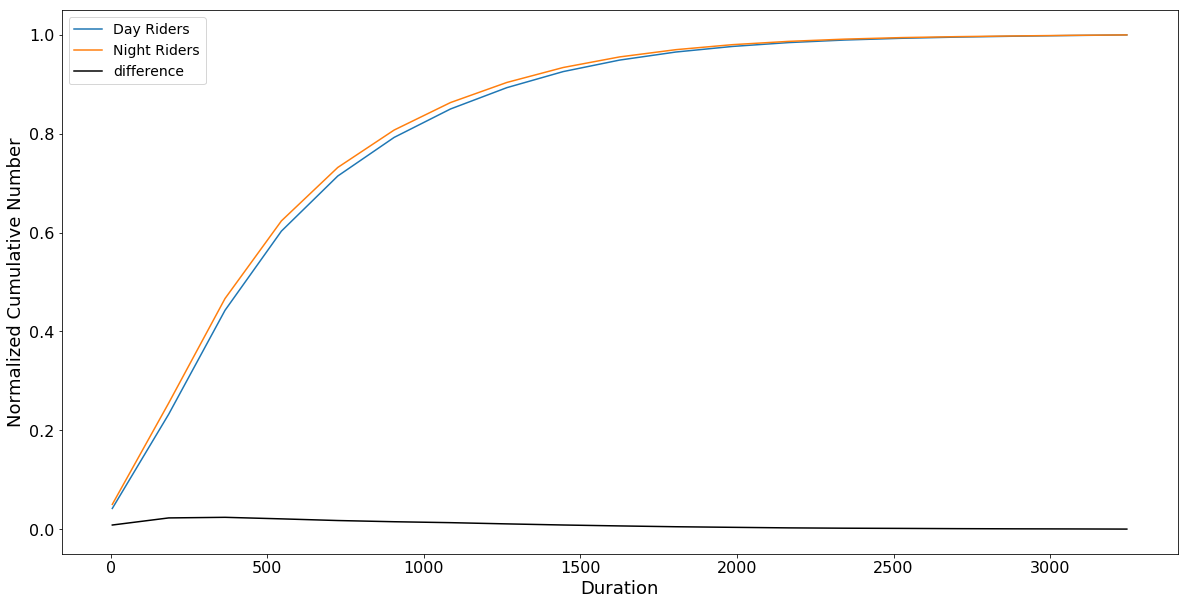

In [71]:
#print dfBikes.Dur, dfBikes.Dur.cumsum()

#dfBikes.DayDur

csDayDur=dfBikes.DayDur.groupby(pd.cut(dfBikes.DayDur, bins)).agg([count_nonzero]).cumsum()


csNightDur=dfBikes.NightDur.groupby(pd.cut(dfBikes.NightDur, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDayDur / csDayDur.max()-csNightDur / csNightDur.max()))

plt.figure(figsize = (20,10))
plt.tick_params(axis='both',labelsize=16)
                                                                                
pl.plot(bins[:-1] + 5, csDayDur / csDayDur.max(), label = "Day Riders")
pl.plot(bins[:-1] + 5, csNightDur / csNightDur.max(), label = "Night Riders")
pl.plot(bins[:-1] + 5, np.sqrt(csNightDur / csNightDur.max() - csDayDur / csDayDur.max())**2, 'k-',
        label = "difference")
pl.xlabel("Duration", fontsize = 18)
pl.ylabel("Normalized Cumulative Number", fontsize = 18)
pl.legend(fontsize=14)

#### Figure 2: The cumulative distribution of CitiBike riders' Duration split by DayRiders (Blue) and NightRiders (Orange). The difference in cumulative distribution is also plotted, and the max difference is observed around 250 seconds.


# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html




In [94]:

ks = scipy.stats.ks_2samp(dfBikes.DayDur, dfBikes.NightDur)

In [95]:
print(ks)

Ks_2sampResult(statistic=0.026632939373263793, pvalue=2.023276745435441e-159)


The scipy KS test returned a test statistic of 0.0266 and a p-value of 2 x 10^-159 (i.e. really small). The very small p-value indicates we reject the null hypothesis. The NULL hypothesis is that the distributions of the two samples are the same - in this case we reject the null and conclude the distributions may be different.


In [119]:
numpy.random.seed(seed=999)

In [120]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

RedactDay = int(dfBikes.DayDur.size / 200)
RedactNight = int(dfBikes.NightDur.size / 200)
#SampleSize = min(LenDay,LenNight)


sortRedactDayDur = sorted(numpy.random.choice(dfBikes.DayDur, size=RedactDay, replace=False))
sortRedactNightDur = sorted(numpy.random.choice(dfBikes.NightDur, size=RedactNight, replace=False))

In [121]:

ksRedact = scipy.stats.ks_2samp(sortRedactDayDur, sortRedactNightDur)

In [122]:
print(ksRedact )

Ks_2sampResult(statistic=0.03865914736704649, pvalue=0.04130316991026927)


The scipy KS test returned a test statistic of 0.0487 and a p-value of 0.0042. Again, the p-value is small and leads us to reject the null hypothesis that the distributions of the two samples are the same. I.e. conclude the two samples come from different distributions


In [ ]:
statistic=0.03865914736704649, pvalue=0.04130316991026927


# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr


In [86]:
LenDay = dfBikes.DayDur.size
LenNight = dfBikes.NightDur.size
SampleSize = min(LenDay,LenNight)

sortRandDayDur = sorted(numpy.random.choice(dfBikes.DayDur, size=SampleSize, replace=False))
sortRandNightDur = sorted(numpy.random.choice(dfBikes.NightDur, size=SampleSize, replace=False))

In [87]:
scipy.stats.pearsonr(sortRandDayDur , sortRandNightDur)

(0.97623268893789772, 0.0)



The Pearson's correlation returned is 0.97623, and p-value returned is 0.0 (likely small, but non-zero if more decimal places were returned). The p-value returned if for a two-tailed test, assessing Null hypothesis of correlation = 0, v.s. two-sided alternative of correlation not equal to zero.

In this case, with the very small p-value, we reject the null to conclude it is very unlikely the datapoints were generated from distributions with correlation equal to zero.


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [89]:
scipy.stats.spearmanr(sortRandDayDur , sortRandNightDur)

SpearmanrResult(correlation=0.99999925194081751, pvalue=0.0)

The Spearman's rank-order correlation returned is 0.99999, and p-value returned is 0.0 (likely small, but non-zero if more decimal places were returned). The p-value returned if for a two-tailed test, assessing Null hypothesis of correlation = 0, v.s. two-sided alternative of correlation not equal to zero.

In this case, with the very small p-value, we reject the null to conclude it is very unlikely the datapoints were generated from distributions with correlation equal to zero.
